# EDA 탐색적 분석_1

In [24]:
#함수 호출
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

#한글 폰트 호출
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = './data/malgun.ttf' # For Windows
#font_location = 'C:/Windows/Fonts/malgunsl.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
#matplotlib.rc('font', family=font_name)
plt.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [193]:
#csv 파일 호출
df = pd.read_csv('./data/20200101_seoul_2014_to_2018_crime_cctv_pop_food_sum.csv')
display(df.head(10))
df.info()

,년도,지역,강도,살인,절도,폭력,강간강제추행,살인강간,강도절도폭력,범죄합계,10만명당범죄수,한국인,등록외국인,세대,인구합계,CCTV,10만명당CCTV수,단란주점,유흥주점,단란유흥
0,2014,강남구,37,13,3895,4394,512,525,8326,8851,1534,571509,5359,234324,576868,430,74,328,276,604
1,2014,강동구,10,5,2425,2804,148,153,5239,5392,1113,479586,4605,186239,484191,59,12,105,151,256
2,2014,강북구,21,6,1494,2320,189,195,3835,4030,1186,336363,3308,141139,339671,74,21,129,74,203
3,2014,강서구,9,8,2341,2717,214,222,5067,5289,907,576574,6331,230553,582906,230,39,169,114,283
4,2014,관악구,25,7,3029,3359,361,368,6413,6781,1270,515688,18120,248703,533809,487,91,100,228,328
5,2014,광진구,16,8,3167,2828,249,257,6011,6268,1651,365993,13493,159134,379486,87,22,89,19,108
6,2014,구로구,14,3,2377,2743,252,255,5134,5389,1179,427022,29736,172682,456758,187,40,100,40,140
7,2014,금천구,9,7,1552,2112,162,169,3673,3842,1488,239510,18669,104002,258180,101,39,84,60,144
8,2014,노원구,8,5,2404,2722,173,178,5134,5312,901,585599,3474,221580,589074,80,13,57,28,85
9,2014,도봉구,11,6,1350,1585,172,178,2946,3124,873,355829,2003,137382,357832,185,51,56,21,77


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 20 columns):
년도            125 non-null int64
지역            125 non-null object
강도            125 non-null int64
살인            125 non-null int64
절도            125 non-null int64
폭력            125 non-null int64
강간강제추행        125 non-null int64
살인강간          125 non-null int64
강도절도폭력        125 non-null int64
범죄합계          125 non-null int64
10만명당범죄수      125 non-null int64
한국인           125 non-null int64
등록외국인         125 non-null int64
세대            125 non-null int64
인구합계          125 non-null int64
CCTV          125 non-null int64
10만명당CCTV수    125 non-null int64
단란주점          125 non-null int64
유흥주점          125 non-null int64
단란유흥          125 non-null int64
dtypes: int64(19), object(1)
memory usage: 19.7+ KB


In [194]:
#서울지역 리스트 생성
seoul_area = list(set(df['지역']))
print(seoul_area)
df[df['지역'] == '중구']

#자치구 별로 csv파일로 추출
for i in seoul_area:
    df[df['지역'] == i].to_csv('./data/seoul_list/'+i+'.csv',encoding='cp949')

['중구', '은평구', '강동구', '동작구', '서대문구', '성동구', '종로구', '양천구', '용산구', '서초구', '노원구', '구로구', '중랑구', '금천구', '강서구', '관악구', '성북구', '광진구', '강북구', '마포구', '도봉구', '송파구', '강남구', '동대문구', '영등포구']


C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


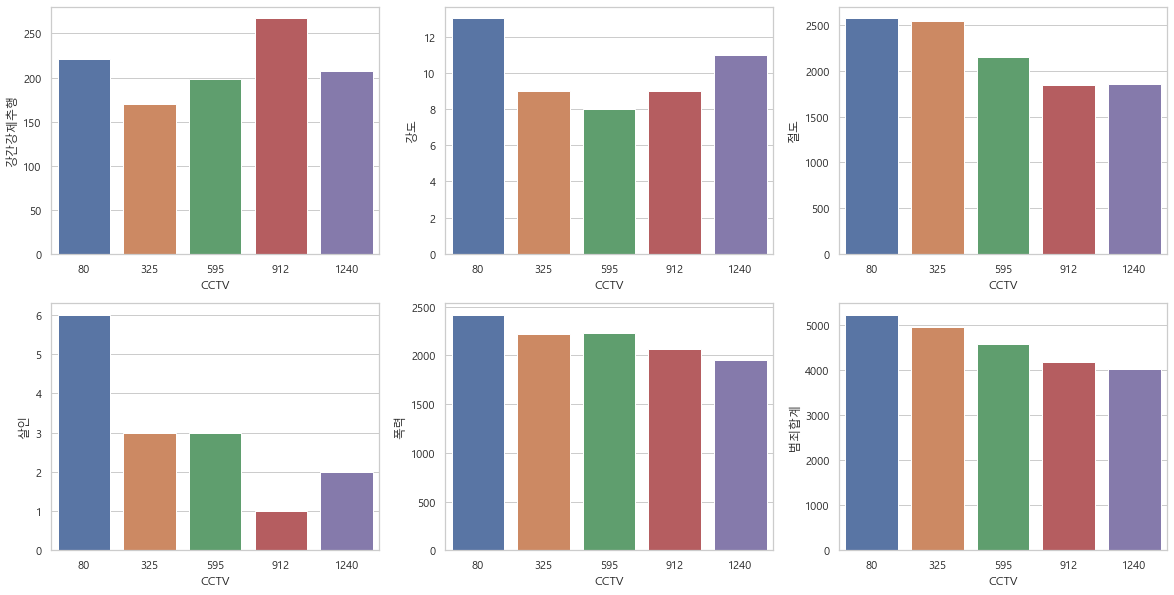

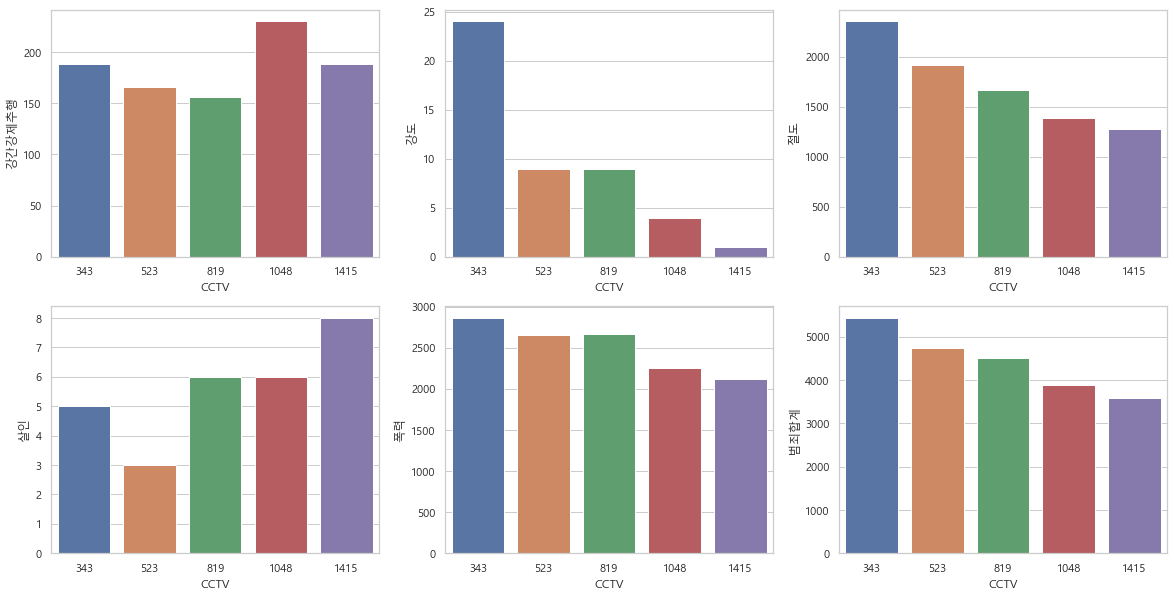

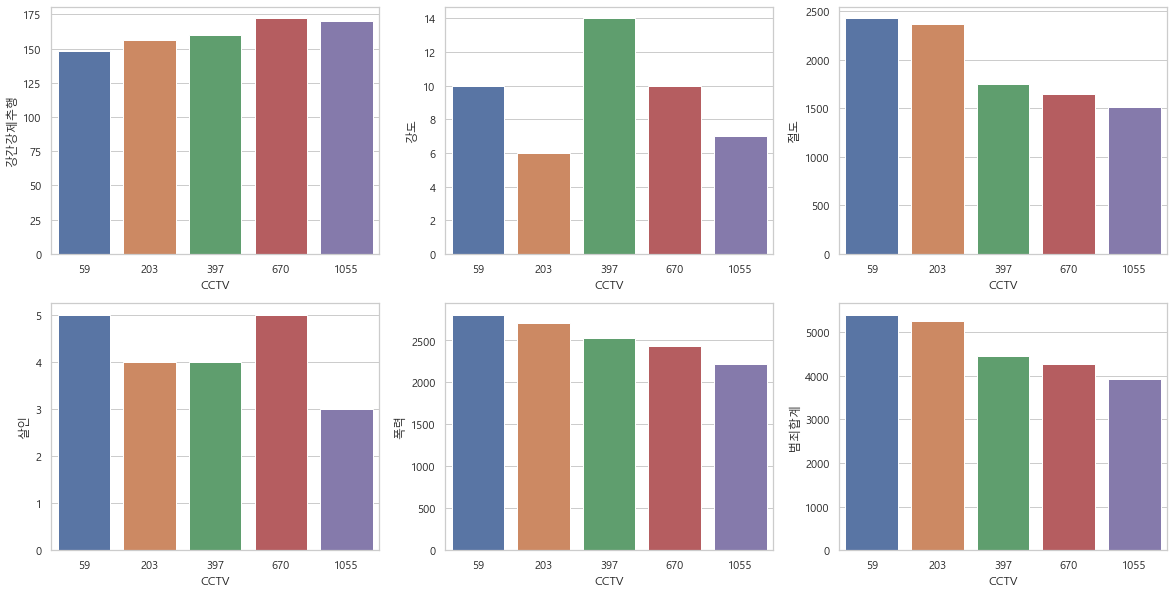

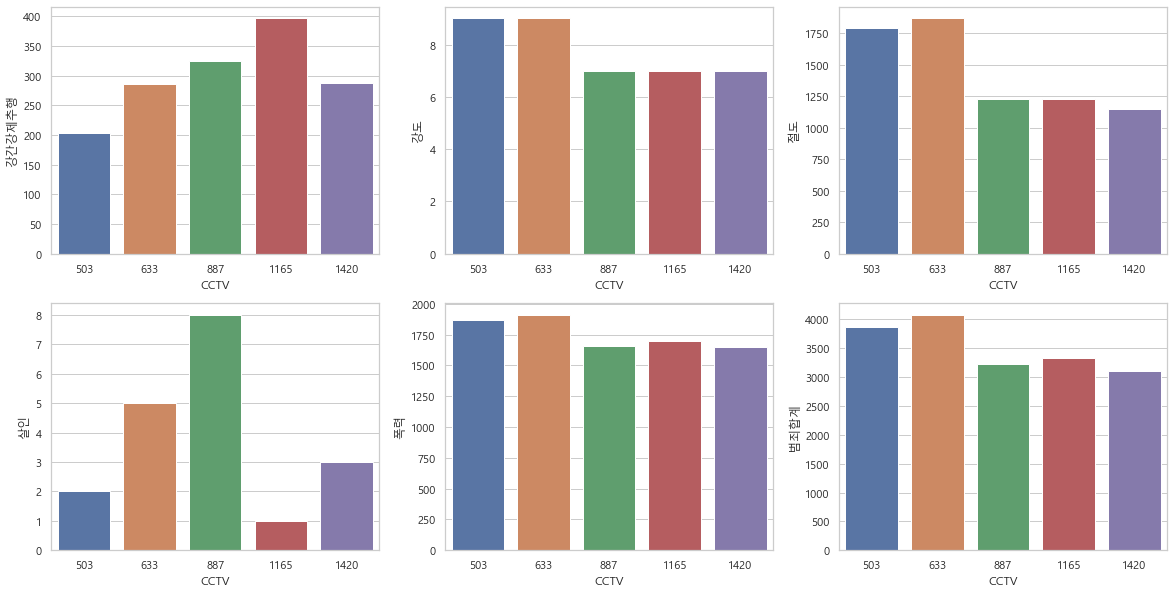

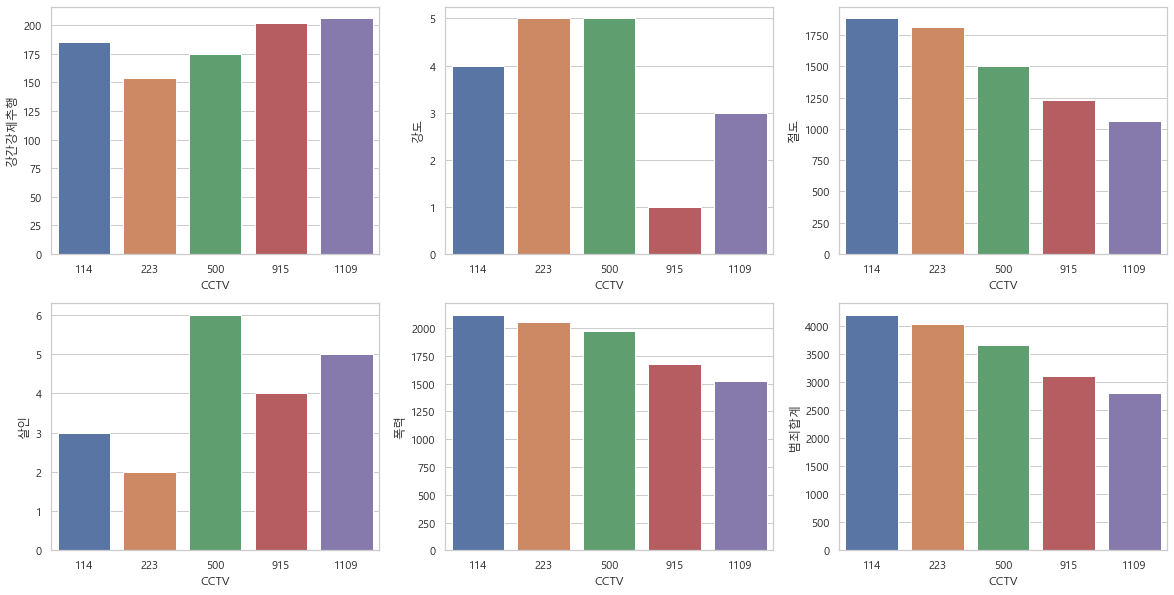

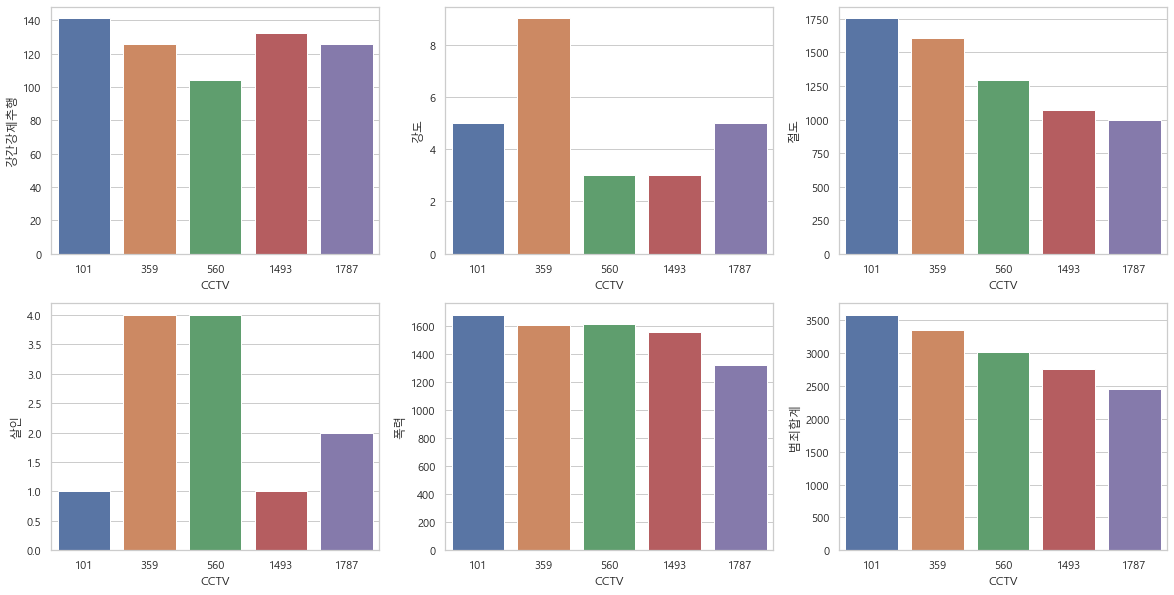

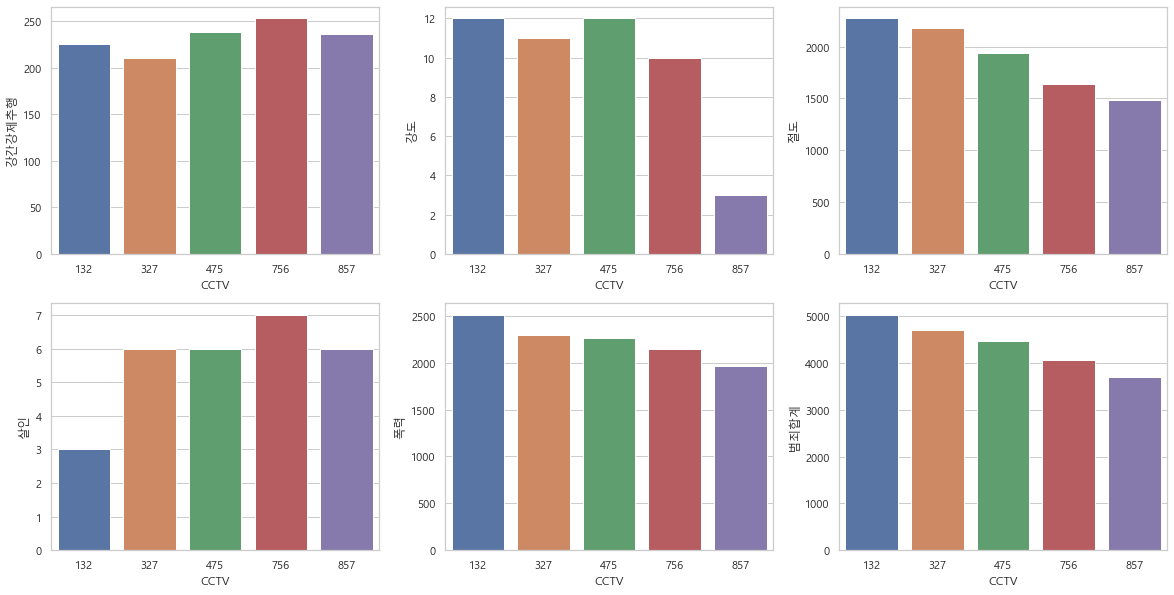

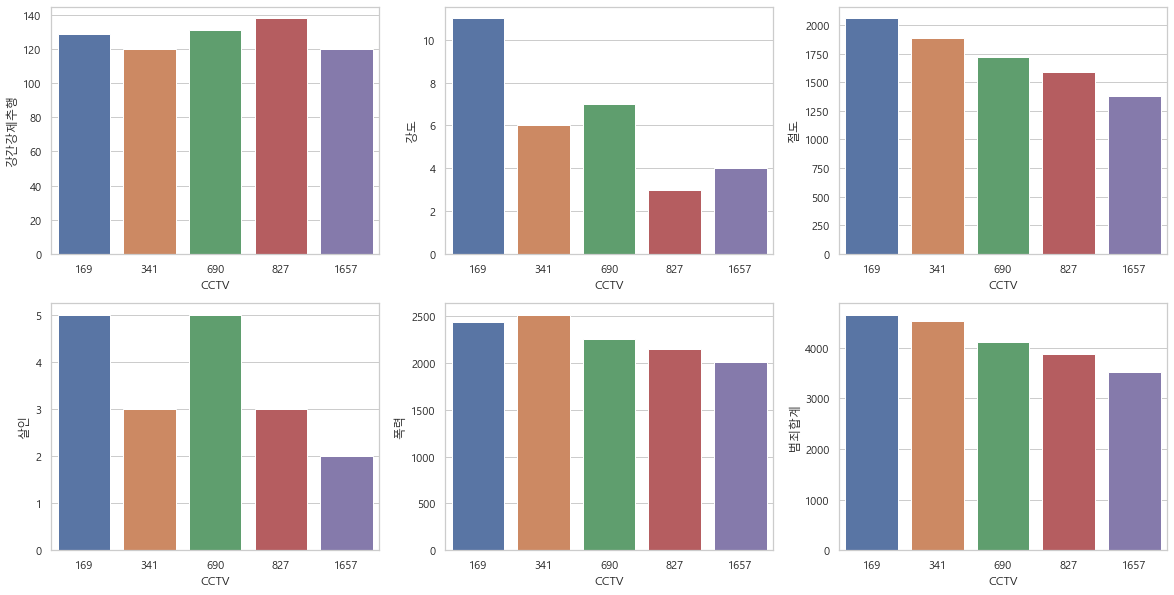

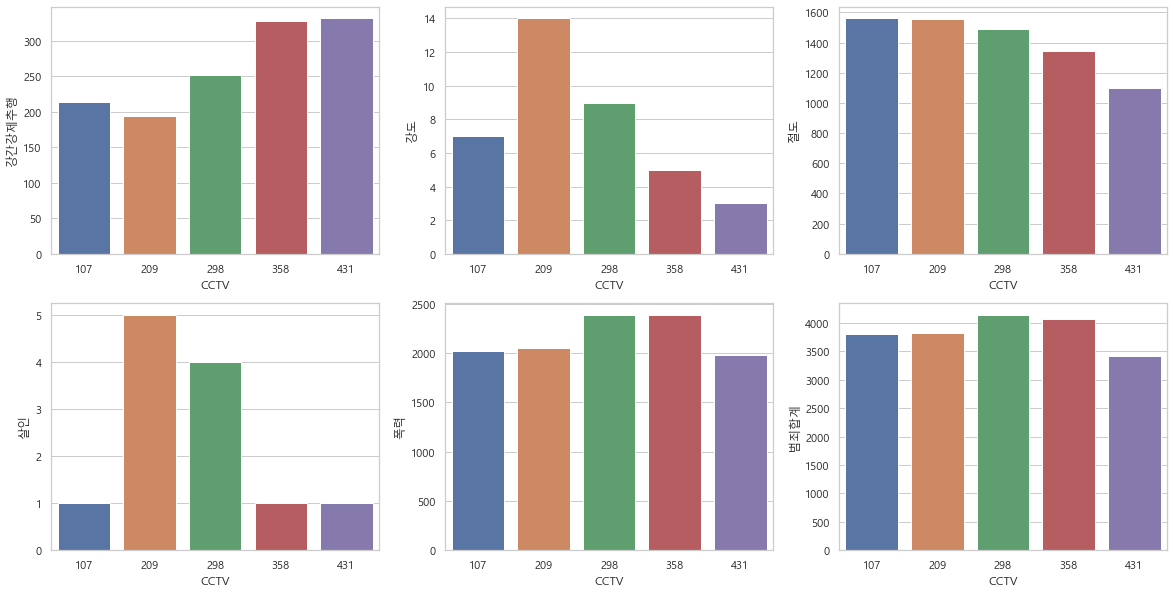

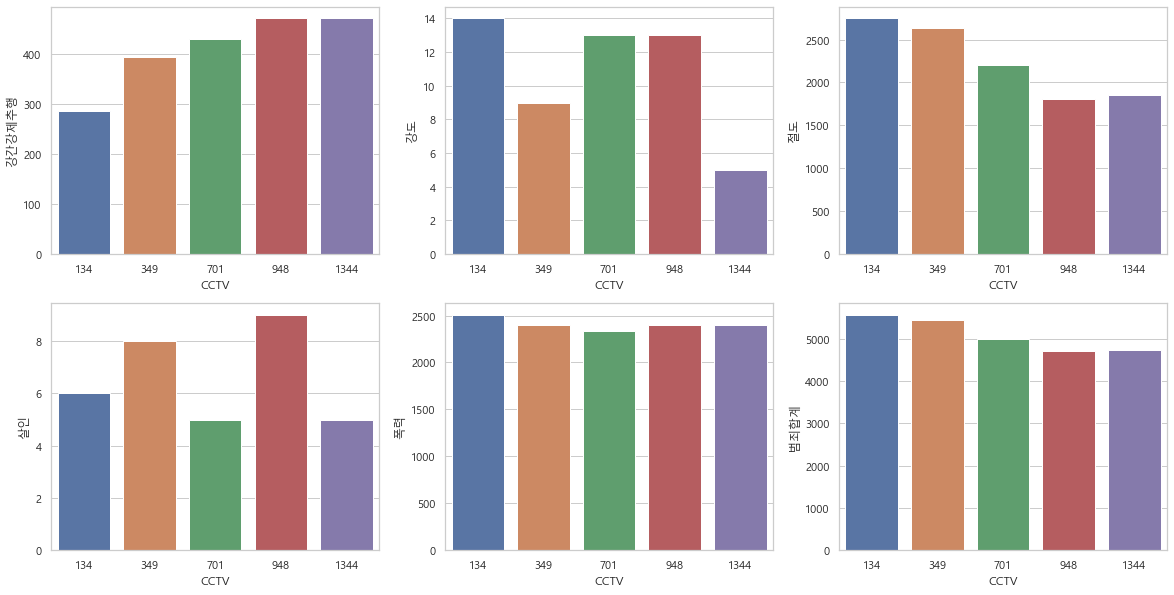

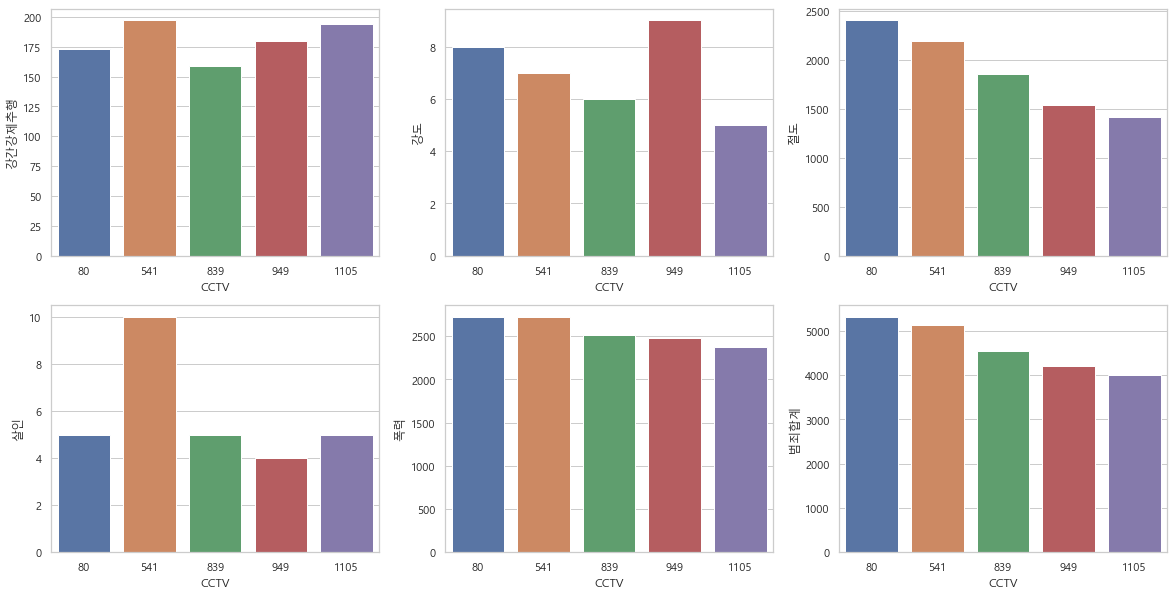

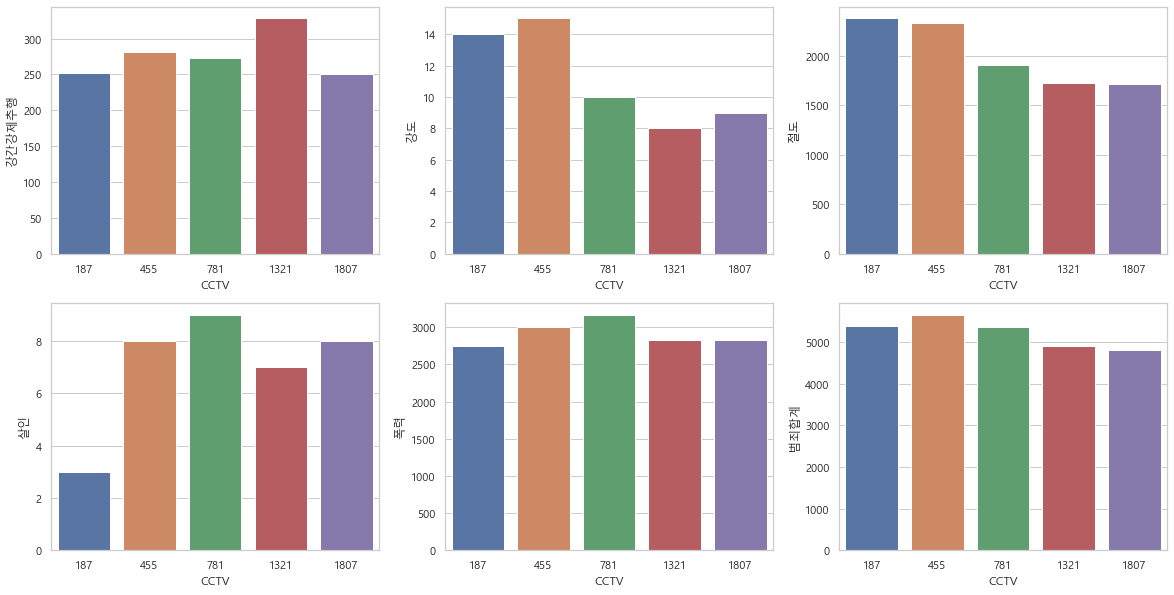

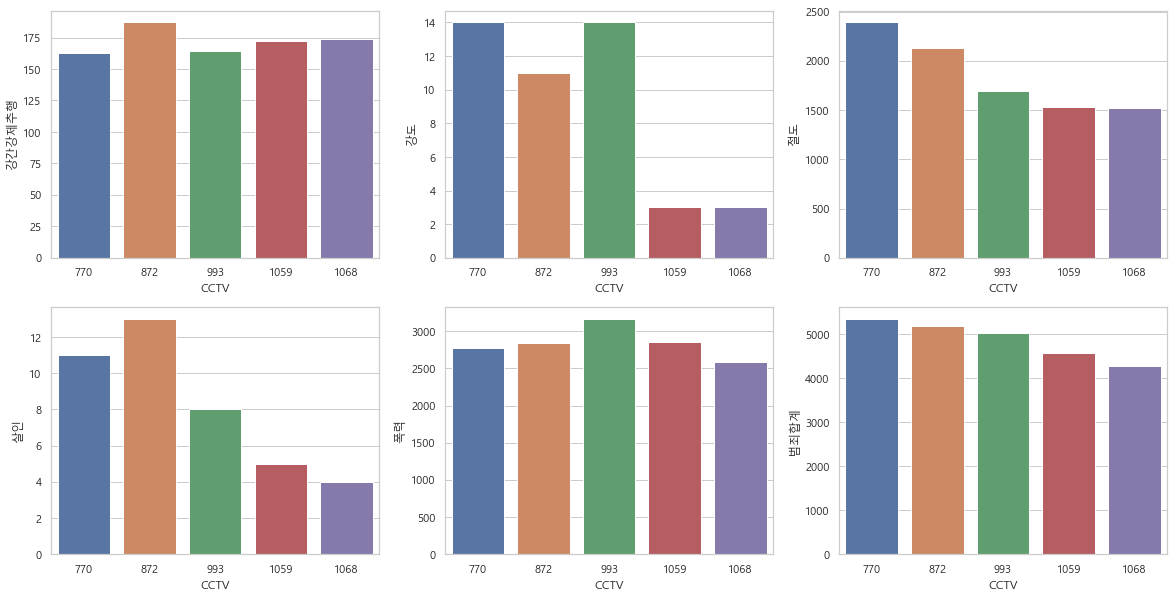

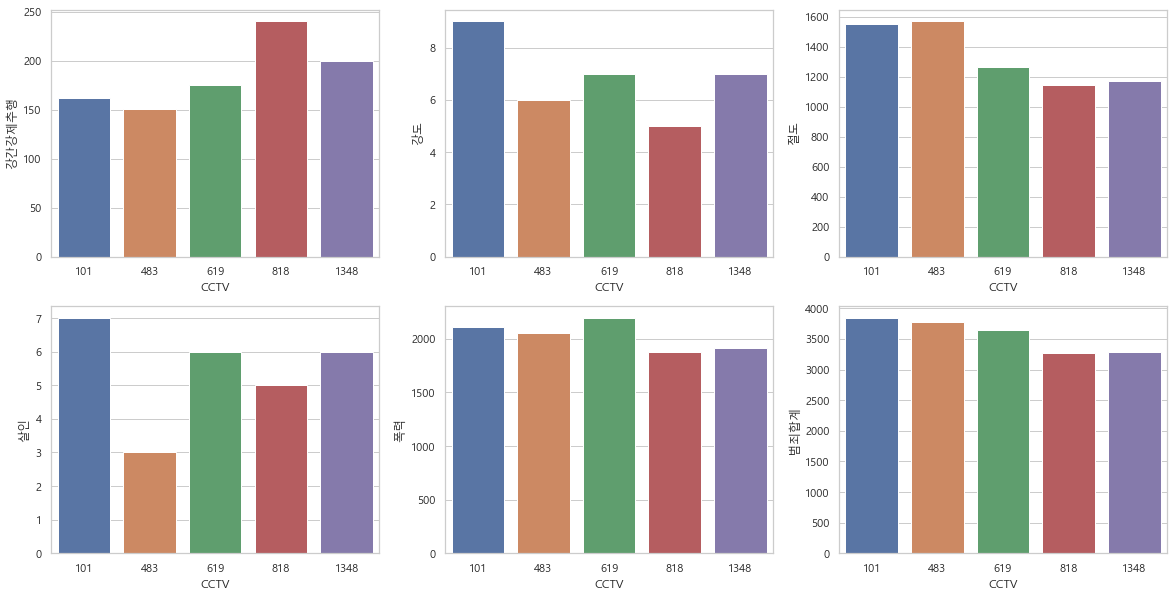

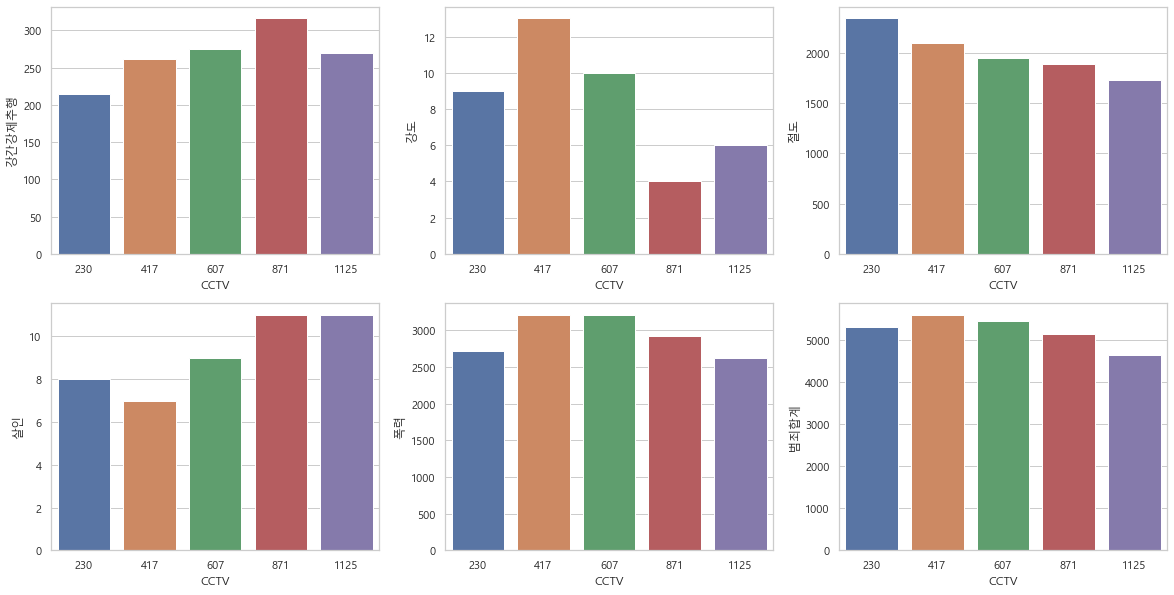

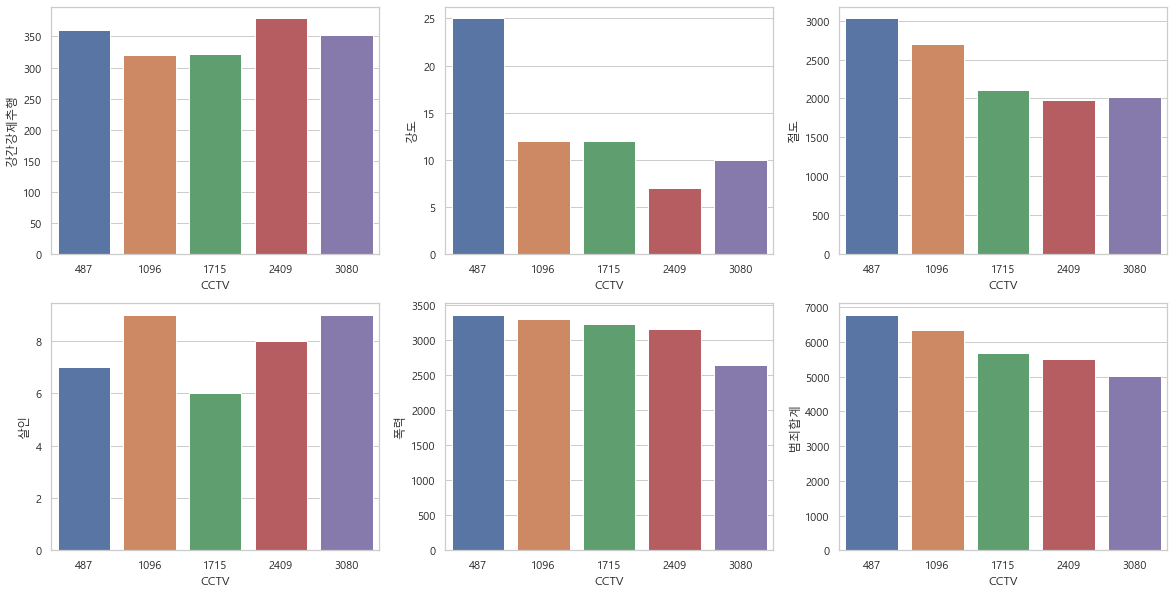

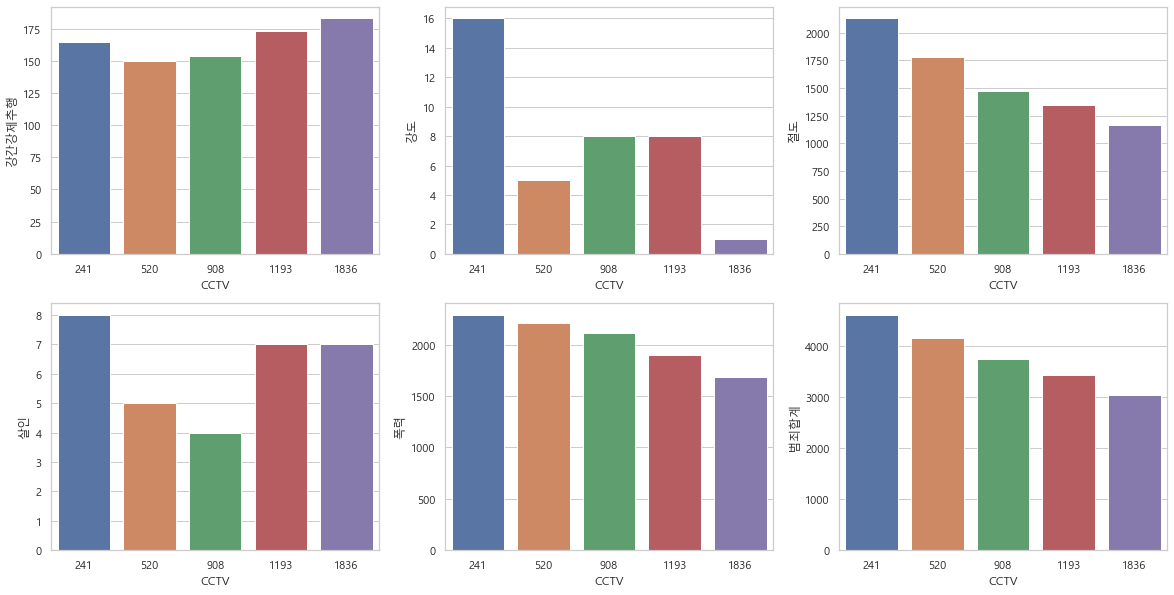

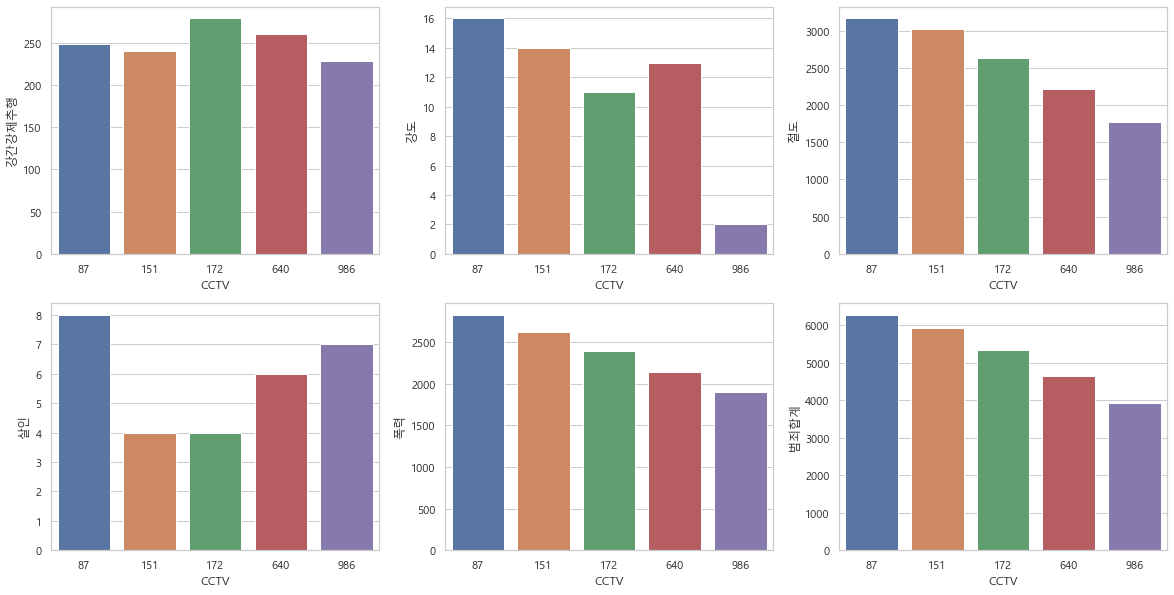

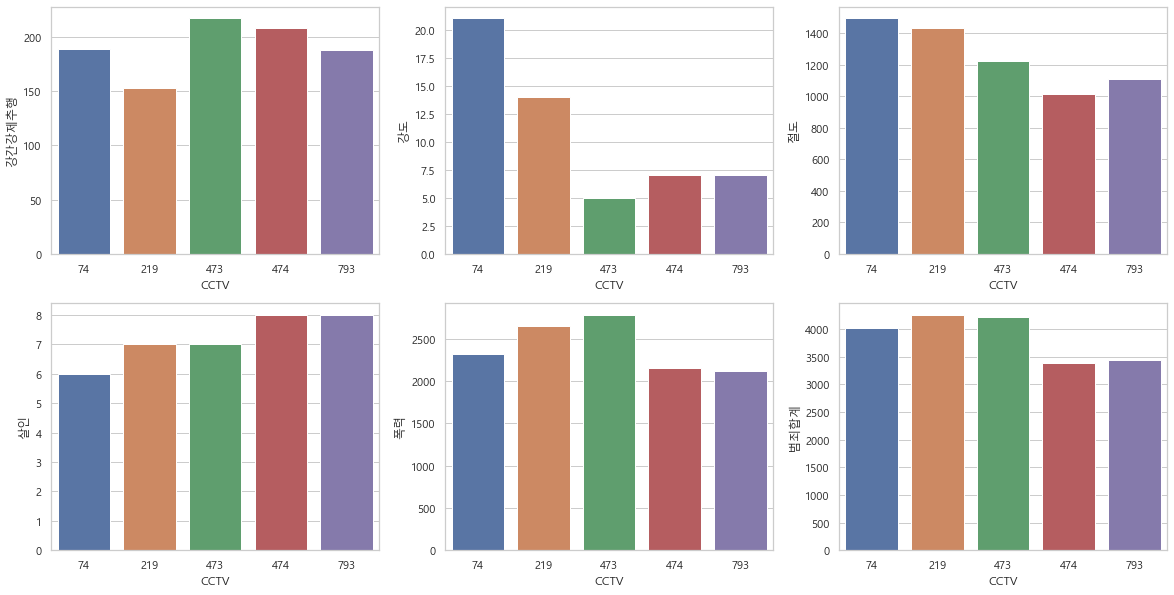

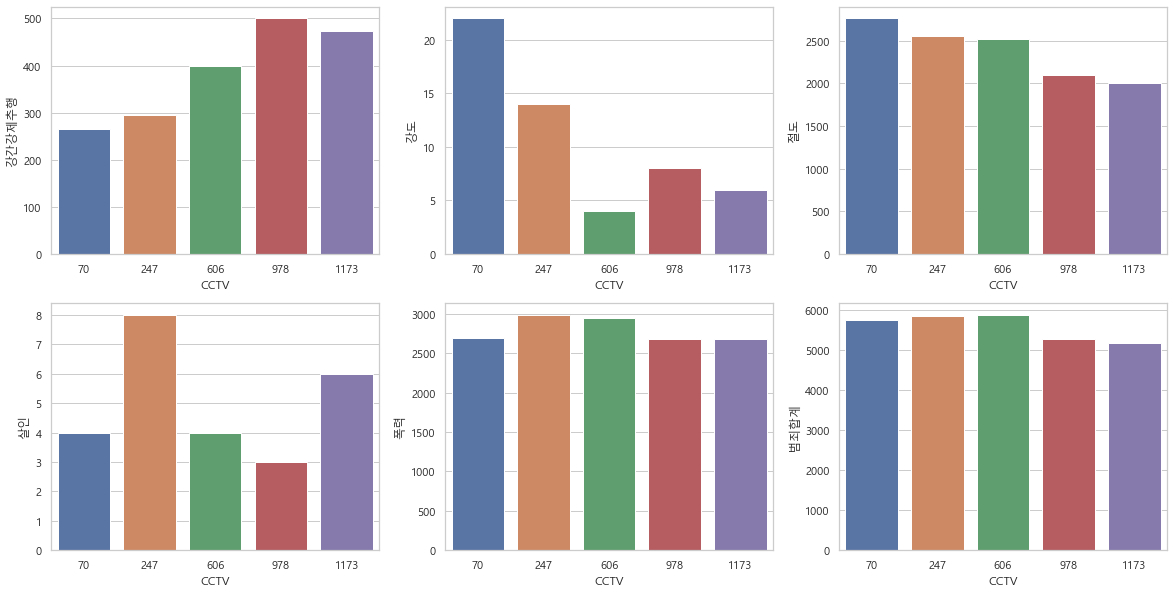

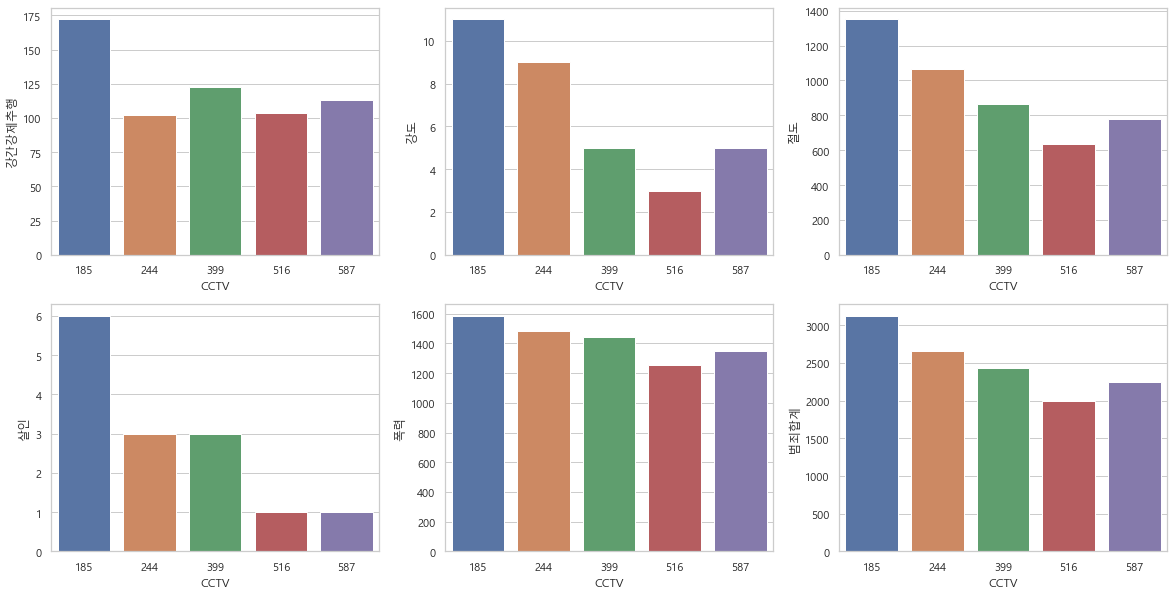

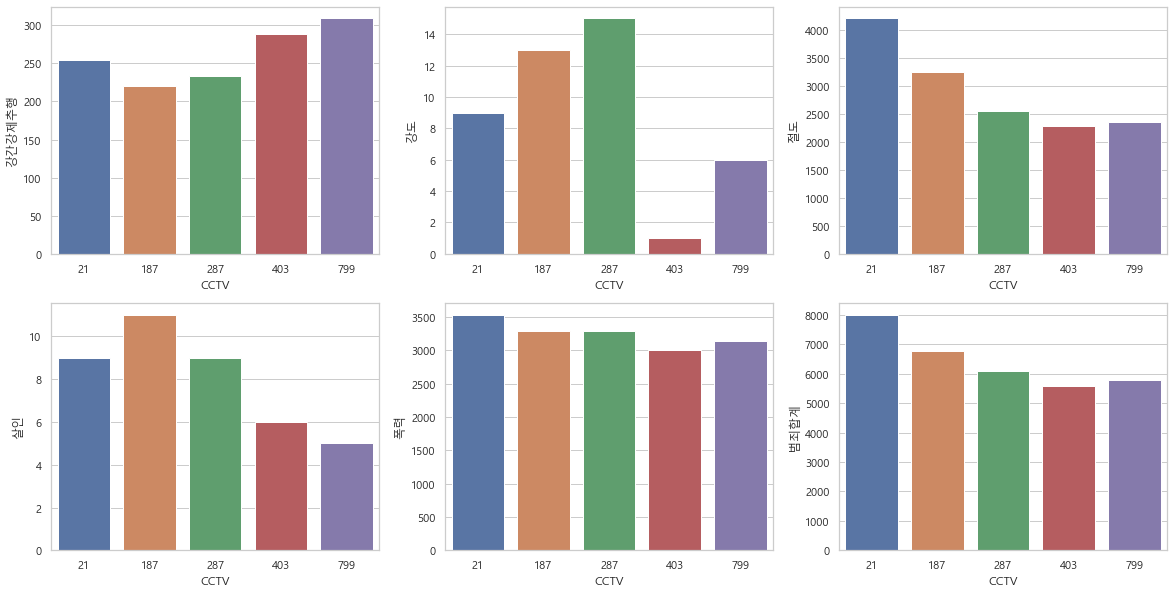

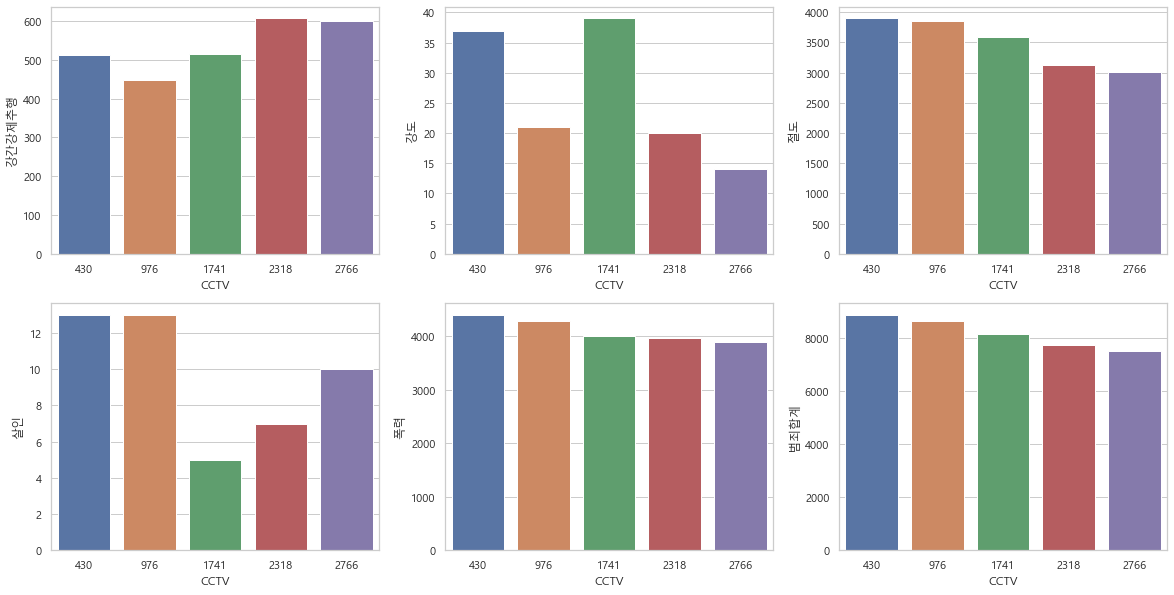

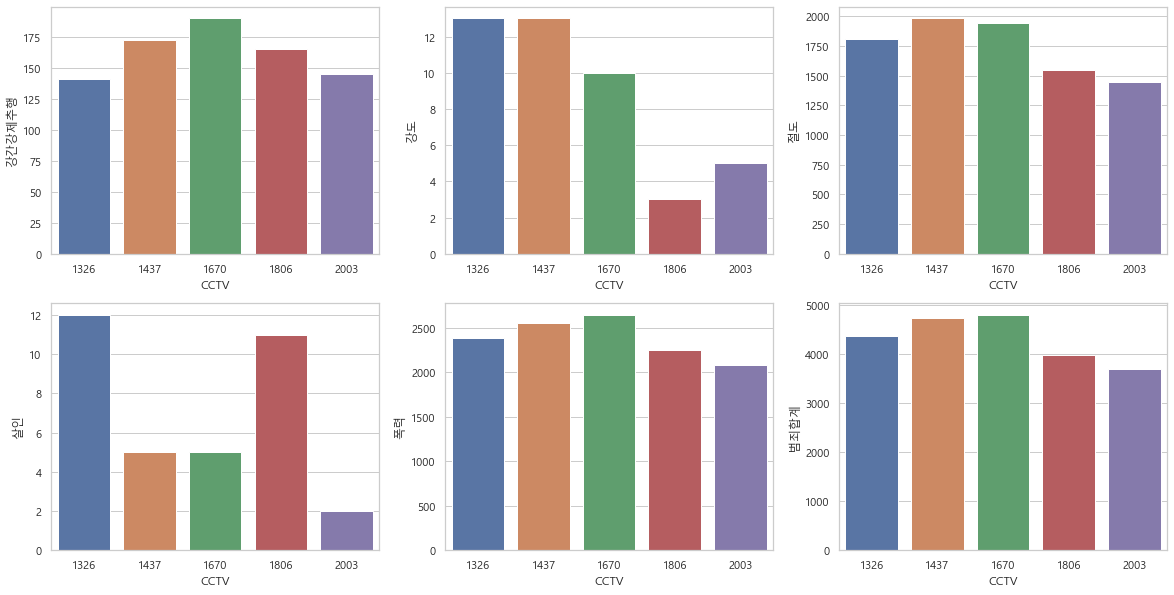

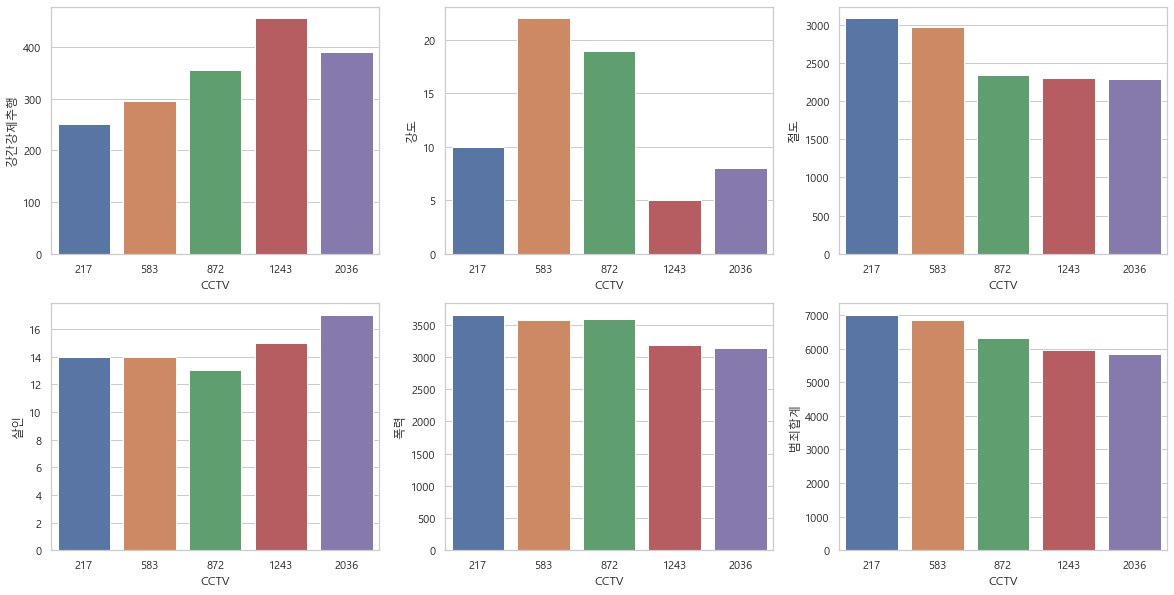

In [195]:
#구별로 그래프 추출
for i in seoul_area:
    #csv 파일 호출
    gdf = pd.read_csv('./data/seoul_list/'+i+'.csv', encoding='cp949',index_col='년도')
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(2, 3, 1)
    ax2 = fig.add_subplot(2, 3, 2)
    ax3 = fig.add_subplot(2, 3, 3)
    ax4 = fig.add_subplot(2, 3, 4)
    ax5 = fig.add_subplot(2, 3, 5)
    ax6 = fig.add_subplot(2, 3, 6)


    sns.barplot(x='CCTV', y='강간강제추행', data=gdf, ax= ax1)
    sns.barplot(x='CCTV', y='강도', data=gdf, ax= ax2)
    sns.barplot(x='CCTV', y='절도', data=gdf, ax= ax3)
    sns.barplot(x='CCTV', y='살인', data=gdf, ax= ax4)
    sns.barplot(x='CCTV', y='폭력', data=gdf, ax= ax5)
    sns.barplot(x='CCTV', y='범죄합계', data=gdf, ax= ax6)

    plt.savefig('./seoul_pic/'+i+'.png')
    
    

## 1.강남구 분석

In [196]:
gn_df = pd.read_csv('./data/seoul_list/강남구.csv', encoding='cp949',index_col='년도')
gn_df.columns

Index(['Unnamed: 0', '지역', '강도', '살인', '절도', '폭력', '강간강제추행', '살인강간', '강도절도폭력',
       '범죄합계', '10만명당범죄수', '한국인', '등록외국인', '세대', '인구합계', 'CCTV', '10만명당CCTV수',
       '단란주점', '유흥주점', '단란유흥'],
      dtype='object')

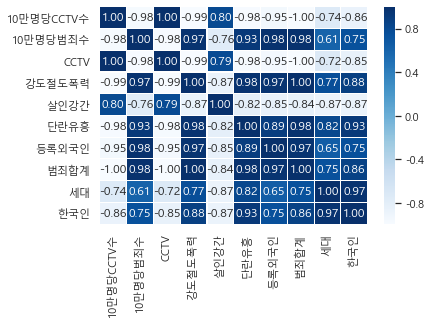

In [197]:
gn_df_corr  = gn_df[['10만명당CCTV수', '10만명당범죄수', 'CCTV', '강도절도폭력','살인강간' , '단란유흥',
     '등록외국인', '범죄합계', '세대', '한국인']].corr()
hm = sns.heatmap(data = gn_df_corr, annot=True, 
fmt = '.2f', linewidths=.1, cmap='Blues')
hm.set_ylim(10.0,0.0)
plt.savefig('./data/seoul_강남구_corr_pic.png')

In [198]:
gn_df_corr['범죄합계']

10만명당CCTV수   -0.997009
10만명당범죄수      0.981234
CCTV         -0.996909
강도절도폭력        0.998399
살인강간         -0.838442
단란유흥          0.977826
등록외국인         0.965407
범죄합계          1.000000
세대            0.746435
한국인           0.861042
Name: 범죄합계, dtype: float64

### 각 컬럼별 지역순위

In [2]:
order_df = pd.read_csv('./data/20200101_seoul_2014_to_2018_crime_cctv_pop_food_sum.csv', encoding='utf-8')
#ddf_2018 = ddf[ddf['지역']=='강남구']
order_df = order_df[order_df['년도'] == 2018]

In [4]:
#인구합계
display(order_df[['지역','인구합계']].sort_values(by=['인구합계'], axis=0, ascending=False).head(5))

#CCTV
display(order_df[['지역','CCTV']].sort_values(by=['CCTV'], axis=0, ascending=False).head(5))

#범죄 합
display(order_df[['지역','범죄합계']].sort_values(by=['범죄합계'], axis=0, ascending=False).head(5))

#살인강간
display(order_df[['지역','살인강간']].sort_values(by=['살인강간'], axis=0, ascending=False).head(5))

#강절폭
display(order_df[['지역','강도절도폭력']].sort_values(by=['강도절도폭력'], axis=0, ascending=False).head(5))

#등록외국인수
display(order_df[['지역','등록외국인']].sort_values(by=['등록외국인'], axis=0, ascending=False).head(5))

#10만명당범죄수
display(order_df[['지역','10만명당범죄수']].sort_values(by=['10만명당범죄수'], axis=0, ascending=False).head(5))

#10만명당CCTV수
display(order_df[['지역','10만명당CCTV수']].sort_values(by=['10만명당CCTV수'], axis=0, ascending=False).head(5))

#단란유흥수
display(order_df[['지역','단란유흥']].sort_values(by=['단란유흥'], axis=0, ascending=False).head(5))

,지역,인구합계
117,송파구,673061
103,강서구,606005
108,노원구,552052
100,강남구,551615
104,관악구,521494


,지역,CCTV
104,관악구,3080
100,강남구,2766
119,영등포구,2036
110,동대문구,2003
116,성북구,1836


,지역,범죄합계
100,강남구,7513
119,영등포구,5840
117,송파구,5807
112,마포구,5172
104,관악구,5026


,지역,살인강간
100,강남구,610
112,마포구,479
114,서초구,475
119,영등포구,408
104,관악구,361


,지역,강도절도폭력
100,강남구,6903
117,송파구,5493
119,영등포구,5432
112,마포구,4693
104,관악구,4665


,지역,등록외국인
119,영등포구,35331
106,구로구,33044
107,금천구,19574
104,관악구,17892
110,동대문구,15777


,지역,10만명당범죄수
123,중구,2977
122,종로구,2256
119,영등포구,1445
120,용산구,1391
100,강남구,1362


,지역,10만명당CCTV수
123,중구,916
104,관악구,590
115,성동구,565
110,동대문구,548
107,금천구,532


,지역,단란유흥
100,강남구,477
119,영등포구,367
122,종로구,340
123,중구,325
104,관악구,305


In [201]:
order_df.head(5)

,년도,지역,강도,살인,절도,폭력,강간강제추행,살인강간,강도절도폭력,범죄합계,10만명당범죄수,한국인,등록외국인,세대,인구합계,CCTV,10만명당CCTV수,단란주점,유흥주점,단란유흥
100,2018,강남구,14,10,3004,3885,600,610,6903,7513,1362,546637,4978,229509,551615,2766,501,266,211,477
101,2018,강동구,7,3,1515,2224,170,173,3746,3919,899,431263,4283,177483,435546,1055,242,91,133,224
102,2018,강북구,7,8,1112,2122,188,196,3241,3437,1056,321496,3694,143223,325191,793,243,126,74,200
103,2018,강서구,6,11,1724,2619,269,280,4349,4629,763,599329,6675,257165,606005,1125,185,171,133,304
104,2018,관악구,10,9,2012,2643,352,361,4665,5026,963,503601,17892,260460,521494,3080,590,93,212,305


## 그래프로 보기 2

In [15]:
graph_df = pd.read_csv('./data/20200101_seoul_2014_to_2018_crime_cctv_pop_food_sum.csv', encoding='utf-8')

In [16]:
graph_df = graph_df.pivot_table(index=['년도'],aggfunc=np.sum)
graph_df.reset_index(level='년도', inplace=True)

graph_df

,년도,10만명당CCTV수,10만명당범죄수,CCTV,강간강제추행,강도,강도절도폭력,단란유흥,단란주점,등록외국인,범죄합계,살인,살인강간,세대,유흥주점,인구합계,절도,폭력,한국인
0,2014,1553,34779,6248,5462,343,125054,5189,2919,257047,130674,158,5620,4192293,2270,10381261,59393,65318,10124202
1,2015,3070,33838,11920,5449,276,120789,5073,2861,272617,126401,163,5612,4196408,2212,10336877,55307,65206,10064252
2,2016,4827,31982,18604,6002,262,111689,4923,2786,272481,117839,148,6150,4192351,2137,10246055,46857,64570,9973564
3,2017,6960,29373,26090,6963,169,100730,4888,2752,267181,107835,142,7105,4213216,2136,10164740,41162,59399,9897549
4,2018,9294,27822,34827,6412,143,95393,4680,2614,276991,101948,143,6555,4249252,2066,10079887,39175,56075,9802883


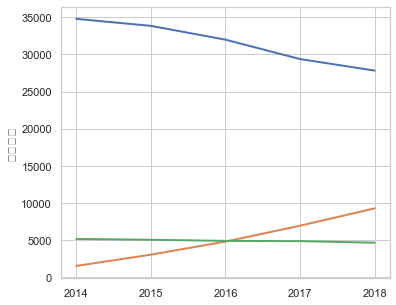

In [19]:
year_col = ['2014','2015','2016','2017','2018']

# 10만명당 CCTV, 단란유흥, 10만명당 범죄수
fig = plt.figure(figsize=(20,5))
sns.set(style="whitegrid")

ax1 = fig.add_subplot(1, 3, 1)
#ax2 = fig.add_subplot(1, 3, 2)
#ax3 = fig.add_subplot(1, 3, 3)

sns.lineplot(x=year_col , y=graph_df['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
sns.lineplot(x=year_col, y=graph_df['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax1)
sns.lineplot(x=year_col, y=graph_df['단란유흥'], palette="tab10", linewidth=2,ax=ax1)
# sns.lineplot(x=year_col , y=graph_df['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
# sns.lineplot(x=year_col, y=graph_df['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax2)
# sns.lineplot(x=year_col, y=graph_df['단란유흥'], palette="tab10", linewidth=2,ax=ax3)


plt.show()
plt.close()

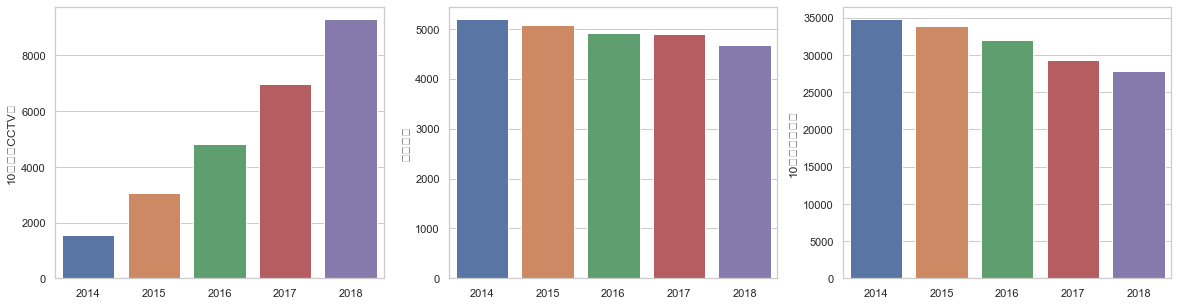

In [205]:
# 10만명당 CCTV, 단란유흥, 10만명당 범죄수
fig = plt.figure(figsize=(20,5))
sns.set(style="whitegrid")

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# sns.lineplot(x="fff" ,y="10만명당CCTV수" , data=ddf['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
# sns.lineplot(data=ddf['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax2)
# sns.lineplot(data=ddf['단란유흥'], palette="tab10", linewidth=2,ax=ax3)

sns.barplot(x=year_col , y=graph_df['10만명당CCTV수'] , ax=ax1)
sns.barplot(x=year_col , y=graph_df['단란유흥'] , ax=ax2)
sns.barplot(x=year_col , y=graph_df['10만명당범죄수'] , ax=ax3)



plt.show()
plt.close()

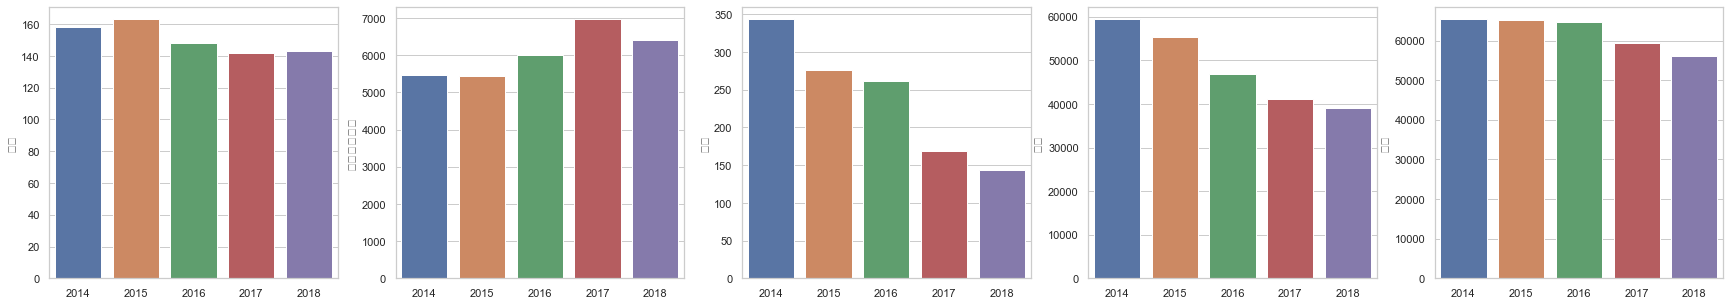

In [206]:
#5대 범죄
fig = plt.figure(figsize=(30,5))

sns.set(style="whitegrid")

ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# sns.lineplot(x="fff" ,y="10만명당CCTV수" , data=ddf['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
# sns.lineplot(data=ddf['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax2)
# sns.lineplot(data=ddf['단란유흥'], palette="tab10", linewidth=2,ax=ax3)

sns.barplot(x=year_col , y=graph_df['살인'] , ax=ax1)
sns.barplot(x=year_col , y=graph_df['강간강제추행'] , ax=ax2)
sns.barplot(x=year_col , y=graph_df['강도'] , ax=ax3)
sns.barplot(x=year_col , y=graph_df['절도'] , ax=ax4)
sns.barplot(x=year_col , y=graph_df['폭력'] , ax=ax5)



plt.show()
plt.close()

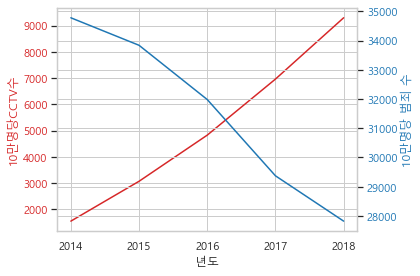

In [25]:
year_col = ['2014','2015','2016','2017','2018']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('년도')
ax1.set_ylabel('10만명당CCTV수', color=color)
ax1.plot(year_col, graph_df['10만명당CCTV수'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('10만명당 범죄 수', color=color)  # we already handled the x-label with ax1
ax2.plot(year_col, graph_df['10만명당범죄수'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
year_col = ['2014','2015','2016','2017','2018']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('년도')
ax1.set_ylabel('10만명당CCTV수', color=color)
ax1.plot(year_col, graph_df['10만명당CCTV수'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('10만명당 범죄 수', color=color)  # we already handled the x-label with ax1
ax2.plot(year_col, graph_df['10만명당범죄수'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
year_col = ['2014','2015','2016','2017','2018']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('년도')
ax1.set_ylabel('10만명당CCTV수', color=color)
ax1.plot(year_col, graph_df['10만명당CCTV수'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('10만명당 범죄 수', color=color)  # we already handled the x-label with ax1
ax2.plot(year_col, graph_df['10만명당범죄수'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()